# Creating Photons from NHLs produced by Pion Zero Decay

## First Part: Defining constants and energy distribution of NHLs from Pion Zero

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from random import uniform
import pickle

In [2]:
#everything is in GeV
m_pion = 0.135
alpha = 1/137
dipole = 5*pow(10,-7)
f_pi = 0.092
capital_f = pow((4*np.pi*f_pi),-1)
m_nhl = 0.035
tau=8.4*pow(10,-17) #in seconds
conversion=6.58*pow(10,25)
factor_gamma=tau*conversion
factor = -((1/(2*np.pi*m_pion))*pow(alpha,2)*pow(dipole,2)*pow(capital_f,2))*factor_gamma

In [3]:
print(factor)

-6.493742068428913e-08


In [4]:
###Equation A.10 from PHYSICAL REVIEW D 98, 115015 (2018)
def f(x):
    return factor*((np.sqrt(pow(x,2)-pow(m_nhl,2)))*(4*pow(x,2)*pow(m_pion,2)-3*x*m_pion*pow(m_nhl,2)-2*x*pow(m_pion,3)+pow(m_nhl,4)+3*pow(m_pion,2)*pow(m_nhl,2))-pow(m_pion,2)*(4*x-m_pion)*pow(m_nhl,2)*np.arctanh((np.sqrt(pow(x,2)-pow(m_nhl,2)))/x))

In [5]:
####being a 3-body decay, I need to fix energy constraints on the NHLs based on the mass
def max_energy_nhl(x):
    return (pow(m_pion,2)+pow(x,2))/(2*m_pion)

In [29]:
min_en_nhl=m_nhl
max_en_nhl=max_energy_nhl(m_nhl)

## Second Part: Simulating Pion Zero using a Sanford-Wang Distribution

You can jump this part and move to part three since I am already giving you the simulated pion zero. 

In [6]:
###this is the proton beam momentum in GeV
p_beam = 8.890

In [7]:
######SW costants for pion plus
c_1_plus = 220.7
c_2_plus = 1.080
c_3_plus = 1.000
c_4_plus = 1.978
c_5_plus = 1.32
c_6_plus = 5.572
c_7_plus = 0.0868
c_8_plus = 9.686
c_9_plus = 1.000

In [8]:
######SW costants for pion minus
c_1_minus = 213.7
c_2_minus = 0.9379
c_3_minus = 5.4545
c_4_minus = 1.210
c_5_minus = 1.284
c_6_minus = 4.781
c_7_minus = 0.07338
c_8_minus = 8.329
c_9_minus = 1.000

In [9]:
###Plotting SW distribution using rejection method as in https://arxiv.org/pdf/1609.01770.pdf appendix H

In [10]:
####creating SW distribution sampling theta from 0 to pi therefore w/ Jacobian

In [11]:
#pion plus as double function sampling theta
#x=angle y=momentum
def j_bis(x,y):
    return c_1_plus*pow(y,c_2_plus)*(1-(y/p_beam))*np.exp(-c_3_plus*(pow(y,c_4_plus)/(pow(p_beam,c_5_plus)))-c_6_plus*x*(y-c_7_plus*p_beam*(pow(np.cos(x),c_8_plus))))*2*np.pi*np.sin(x)

In [12]:
#pion minus as double function sampling theta
def k_bis(x,y):
    return c_1_minus*pow(y,c_2_minus)*(1-(y/p_beam))*np.exp(-c_3_minus*(pow(y,c_4_minus)/(pow(p_beam,c_5_minus)))-c_6_minus*x*(y-c_7_minus*p_beam*(pow(np.cos(x),c_8_minus))))*np.sin(x)*2*np.pi

In [13]:
#pion zero as double function sampling theta
def l_bis(x,y):
    return (j_bis(x,y)+k_bis(x,y))/2

In [14]:
#many couples angle/momentum will be discarded so you need to start with a high number of couples
angle_max = []
momentum_max = []
number_max = 10000000 #10 millions

for i in range (number_max):
    angle_max.append(uniform(0,np.pi/2))
    momentum_max.append(uniform(0,8))

In [15]:
#you need to find the max of the function in the given ranges of angle and momentum
sw_max_list = []
for i in range (number_max):
    sw_max_list.append(l_bis(angle_max[i],momentum_max[i]))

In [16]:
sw_max=max(sw_max_list)
print(sw_max)

171.42630141904684


In [17]:
###clear memory from lists I am not using again

angle_max = None
del angle_max
momentum_max = None
del momentum_max
sw_max_list = None
del sw_max_list

In [ ]:
####this is with Jacobian, sampling from angle, and in GeV
#many couples angle/momentum will be discarded so you need to start with a high number of couples
zero_and_one = None
del zero_and_one
random_angle = None
del random_angle
random_momentum = None
del random_momentum
good_angle = None
del good_angle
good_momentum = None
del good_momentum
sw_values = None
del sw_values

#number=9000000
number_pion = 100000000 #100millions
zero_and_one = [number_pion]
zero_and_one = np.random.random(number_pion)
random_angle = []
random_momentum = []
good_angle = []
good_momentum = []
sw_values = []

for i in range (number_pion):
    random_angle.append(uniform(0,np.pi/2))
    random_momentum.append(uniform(0,8))
    if l_bis(random_angle[i], random_momentum[i])>zero_and_one[i]*sw_max:
        good_angle.append(random_angle[i])
        good_momentum.append(random_momentum[i])
        sw_values.append(l_bis(random_angle[i], random_momentum[i]))

## Part Three: Create Pion Zero Four-Momenta, Simulate NHLs and Boost them

Since the production of Pion Zero is always identical, the next two lines contain the code to open the pre-made momentum and angle for pion zero. 

In [18]:
###momentum pion zero
with open(r"C:\Users\Lenovo\Documents\lavoro\mit\2020_10_22\good_momentum.txt", "rb") as fp:   #Pickling
        momentum_pion_zero = pickle.load(fp)

In [19]:
###momentum angle
with open(r"C:\Users\Lenovo\Documents\lavoro\mit\2020_10_22\good_angle.txt", "rb") as fp:   #Pickling
        angle_pion_zero = pickle.load(fp)

In [20]:
number_particles=len(angle_pion_zero)

In [16]:
###Create the momentum vector for the NHLs

In [25]:
#create the energy of the Pion Zeros
energy_vector_pion_zero = None
del energy_vector_pion_zero
energy_vector_pion_zero = []
for i in range(number_particles):
    energy_vector_pion_zero.append(np.sqrt(pow(momentum_pion_zero[i],2)+pow(m_pion,2)))

In [26]:
####sample angle phi from 0 to 2*np.pi
angle_phi_pion_zero = None
del angle_phi_pion_zero
angle_phi_pion_zero = []
for i in range(number_particles):
    angle_phi_pion_zero.append(uniform(0,2*np.pi))

In [27]:
####create the four-momentum vector
four_momenta_pion_zero = None
del four_momenta_pion_zero
four_momenta_pion_zero = []
for i in range(number_particles):
    four_momenta_pion_zero.append((energy_vector_pion_zero[i],momentum_pion_zero[i]*np.cos(angle_phi_pion_zero[i])*np.sin(angle_pion_zero[i]),momentum_pion_zero[i]*np.sin(angle_phi_pion_zero[i])*np.sin(angle_pion_zero[i]),momentum_pion_zero[i]*np.cos(angle_pion_zero[i])))

In [39]:
###now I produce NHls with weight given by A10 in the same number of Pion Zeros. Being a stochastic process I have first
####to produce the pions

In [31]:
#####sampling nhl energy with appropriate kinetic constraints, cos(theta) from -1 to 1, and phi from 0 to 2*pi
angle_cos_theta_nhl = None
del angle_cos_theta_nhl
angle_phi_nhl = None
del angle_phi_nhl
energy_nhl = None
del energy_nhl
weight_nhl = None
del weight_nhl

angle_cos_theta_nhl = []
angle_phi_nhl = []
energy_nhl = []
weight_nhl = []


for i in range (number_particles):
    angle_cos_theta_nhl.append(uniform(-1,1))
    angle_phi_nhl.append(uniform(0,2*np.pi))
    energy_nhl.append(uniform(min_en_nhl,max_en_nhl))
    weight_nhl.append(f(energy_nhl[i]))

In [35]:
momentum_nhl = None
del momentum_nhl 

momentum_nhl = []

for i in range(number_particles):
    momentum_nhl.append(np.sqrt(pow(energy_nhl[i],2)-pow(m_nhl,2)))

In [36]:
four_momenta_nhl = None
del four_momenta_nhl

four_momenta_nhl = []

for i in range(number_particles):
    four_momenta_nhl.append((energy_nhl[i],momentum_nhl[i]*np.cos(angle_phi_nhl[i])*np.sin(np.arccos(angle_cos_theta_nhl[i])),momentum_nhl[i]*np.sin(angle_phi_nhl[i])*np.sin(np.arccos(angle_cos_theta_nhl[i])),momentum_nhl[i]*angle_cos_theta_nhl[i]))

In [26]:
####Boost NHLs in lab frame with boosting coming from pion zero

In [38]:
Iway = 1

In [40]:
ptot_vector = 0
del ptot_vector

ptot_vector = []

for i in range(number_particles):
    ptot_vector.append(np.sqrt(max(0.0,pow(four_momenta_pion_zero[i][1],2)+pow(four_momenta_pion_zero[i][2],2)+pow(four_momenta_pion_zero[i][3],2))))

In [41]:
for i in range(number_particles):
    if(ptot_vector[i]<0.0):
        print('ERROR')

In [42]:
g_vector = 0
del g_vector
gb_vector = 0
del gb_vector

g_vector = []
gb_vector = []

for i in range(number_particles):
    g_vector.append(four_momenta_pion_zero[i][0]/m_pion)
    gb_vector.append(float(Iway)*ptot_vector[i]/m_pion)

In [43]:
pp_vector = 0
del pp_vector
pp_vector = []

for i in range(number_particles):
    pp_vector.append((four_momenta_pion_zero[i][1]*four_momenta_nhl[i][1] + four_momenta_pion_zero[i][2]*four_momenta_nhl[i][2] + four_momenta_pion_zero[i][3]*four_momenta_nhl[i][3])/ptot_vector[i])

In [48]:
nhl_boosted = 0
del nhl_boosted
nhl_boosted = []

for i in range(number_particles):
    nhl_boosted.append((g_vector[i]*four_momenta_nhl[i][0]+gb_vector[i]*pp_vector[i],(gb_vector[i]*four_momenta_nhl[i][0]+(g_vector[i]-1.)*pp_vector[i])*four_momenta_pion_zero[i][1]/ptot_vector[i] + four_momenta_nhl[i][1],(gb_vector[i]*four_momenta_nhl[i][0]+(g_vector[i]-1.)*pp_vector[i])*four_momenta_pion_zero[i][2]/ptot_vector[i] + four_momenta_nhl[i][2],(gb_vector[i]*four_momenta_nhl[i][0]+(g_vector[i]-1.)*pp_vector[i])*four_momenta_pion_zero[i][3]/ptot_vector[i] + four_momenta_nhl[i][3]))

In [58]:

energy_nhl_boosted = 0
del energy_nhl_boosted
energy_pion_zero = 0
del energy_pion_zero


energy_nhl_boosted = []
energy_pion_zero = []

for i in range(number_particles):

    energy_nhl_boosted.append(nhl_boosted[i][0])
    energy_pion_zero.append(four_momenta_pion_zero[i][0])#pion_zero

## Part Four: Simulating Photons and Boosting them in NHLs' Lab Frame

In [51]:
#####simulating photons

In [50]:
#####sampling energy m_nhl/2, cos(theta) from -1 to 1, and phi from 0 to 2*pi
angle_cos_theta_photon = None
del angle_cos_theta_photon
angle_phi_photon = None
del angle_phi_photon



angle_cos_theta_photon = []
angle_phi_photon = []
energy_photon = m_nhl/2 #GeV


#number_photon = 1000

for i in range (number_particles):
    angle_cos_theta_photon.append(uniform(-1,1))
    angle_phi_photon.append(uniform(0,2*np.pi))

In [51]:
four_momenta_photon = None
del four_momenta_photon

four_momenta_photon = []

for i in range(number_particles):
    four_momenta_photon.append((energy_photon,energy_photon*np.cos(angle_phi_photon[i])*np.sin(np.arccos(angle_cos_theta_photon[i])),energy_photon*np.sin(angle_phi_photon[i])*np.sin(np.arccos(angle_cos_theta_photon[i])),energy_photon*angle_cos_theta_photon[i]))

In [54]:
#### boosting photons produced by decay NHL

In [52]:
ptot_vector_2 = 0
del ptot_vector_2

ptot_vector_2 = []

for i in range(number_particles):
    ptot_vector_2.append(np.sqrt(max(0.0,pow(nhl_boosted[i][1],2)+pow(nhl_boosted[i][2],2)+pow(nhl_boosted[i][3],2))))

In [42]:
for i in range(number_particles):
    if(ptot_vector_2[i]<0.0):
        print('ERROR')

In [53]:
g_vector_2 = 0
del g_vector_2
gb_vector_2 = 0
del gb_vector_2

g_vector_2 = []
gb_vector_2 = []

for i in range(number_particles):
    g_vector_2.append(nhl_boosted[i][0]/m_nhl)
    gb_vector_2.append(float(Iway)*ptot_vector_2[i]/m_nhl)

In [54]:
pp_vector_2 = 0
del pp_vector_2
pp_vector_2 = []

for i in range(number_particles):
    pp_vector_2.append((nhl_boosted[i][1]*four_momenta_photon[i][1] + nhl_boosted[i][2]*four_momenta_photon[i][2] + nhl_boosted[i][3]*four_momenta_photon[i][3])/ptot_vector_2[i])

In [56]:
photon_boosted = 0
del photon_boosted
photon_boosted = []

for i in range(number_particles):
    photon_boosted.append((g_vector_2[i]*four_momenta_photon[i][0]+gb_vector_2[i]*pp_vector_2[i],(gb_vector_2[i]*four_momenta_photon[i][0]+(g_vector_2[i]-1.)*pp_vector_2[i])*nhl_boosted[i][1]/ptot_vector_2[i] + four_momenta_photon[i][1],(gb_vector_2[i]*four_momenta_photon[i][0]+(g_vector_2[i]-1.)*pp_vector_2[i])*nhl_boosted[i][2]/ptot_vector_2[i] + four_momenta_photon[i][2],(gb_vector_2[i]*four_momenta_photon[i][0]+(g_vector_2[i]-1.)*pp_vector_2[i])*nhl_boosted[i][3]/ptot_vector_2[i] + four_momenta_photon[i][3]))

## Part Five: Work Out the Weight related to the travel of NHLs into MB

In [69]:
def l_decay_function(x):
    return 396*(pow((0.050/m_nhl),4))*((pow(10,-6))/dipole)*(x/0.999)

In [70]:
momentum_nhl_decay = None
del momentum_nhl_decay
momentum_nhl_decay = []
for i in range(number_particles):
    momentum_nhl_decay.append(np.sqrt(pow(energy_nhl_boosted[i],2)-pow(m_nhl,2)))

In [71]:
l_decay = None
del l_decay
l_decay=[]
for i in range(number_particles):
    l_decay.append(l_decay_function(momentum_nhl_decay[i]))

In [72]:
def probability_function(x,y,z):#xlenter, ylexit,zledecay
    return (np.exp(-x/z))-(np.exp(-y/z))

In [65]:
####line sphere intersection

In [66]:
#####step 1. make all momentum vectors unitary vectors

In [73]:
nhl_boosted_x = 0
del nhl_boosted_x
nhl_boosted_y = 0
del nhl_boosted_y
nhl_boosted_z = 0
del nhl_boosted_z
nhl_boosted_x = []
nhl_boosted_y = []
nhl_boosted_z = []

for i in range(number_particles):
    nhl_boosted_x.append(nhl_boosted[i][1])
    nhl_boosted_y.append(nhl_boosted[i][2])
    nhl_boosted_z.append(nhl_boosted[i][3])
    
nhl_boosted_max_x = max(nhl_boosted_x)
nhl_boosted_max_y = max(nhl_boosted_y)
nhl_boosted_max_z = max(nhl_boosted_z)
nhl_boosted_min_x = min(nhl_boosted_x)
nhl_boosted_min_y = min(nhl_boosted_y)
nhl_boosted_min_z = min(nhl_boosted_z)

In [74]:
def norm_vect(x,y,z):
    return np.sqrt(pow(x,2)+pow(y,2)+pow(z,2))

In [76]:
norm_vect_list = None
del norm_vect_list
norm_vect_list = []

for i in range(number_particles):
    norm_vect_list.append(norm_vect(nhl_boosted_x[i],nhl_boosted_y[i],nhl_boosted_z[i]))

In [77]:
####rapid check all vectors are normalised

for i in range(number_particles):
    if (np.sqrt(pow(nhl_boosted_x[i],2)+pow(nhl_boosted_y[i],2)+pow(nhl_boosted_z[i],2))/norm_vect_list[i])<1:
        print("Error")

In [78]:
cos_theta_boosted_gamma = None
del cos_theta_boosted_gamma

cos_theta_boosted_gamma = []

for i in range(number_particles):
    cos_theta_boosted_gamma.append(np.arccos(nhl_boosted_z[i]/norm_vect_list[i]))

In [79]:
###calculate delta as described by wikipedia

##centre of line set at (0,0,0)
###centre of MB set at (0,0,541)
r_MB=5
length_from_MB=541

def delta(z,N):
    return pow(z*length_from_MB/N,2)-(pow(length_from_MB,2)-pow(r_MB,2))

In [80]:
delta_list = None
del delta_list
delta_list = []
for i in range(number_particles):
    delta_list.append(delta(nhl_boosted_z[i],norm_vect_list[i]))

In [82]:
def l_enter(z,N,D):
    return z*length_from_MB/N-D

In [83]:
def l_exit(z,N,D):
    return z*length_from_MB/N+D

In [84]:
l_enter_list=None
del l_enter_list

l_enter_list = []

for i in range(number_particles):
    if(delta_list[i])<0:
        l_enter_list.append(0)
    elif(delta_list[i]==0):
        l_enter_list.append(0)      
    else:
        l_enter_list.append(l_enter(nhl_boosted_z[i],norm_vect_list[i],np.sqrt(delta_list[i])))
        
#for y in range(number_particles):
#    if nhl_boosted_z[y]<0 and delta_list[y]>0:
#        l_enter_list[y]=0
#        print(y)

30376
2004857


In [85]:
l_exit_list=None
del l_exit_list

l_exit_list = []

for i in range(number_particles):
    if(delta_list[i])<0:
        l_exit_list.append(0)
    elif(delta_list[i]==0):
        l_esit_list.append(0)
    else:
        l_exit_list.append(l_exit(nhl_boosted_z[i],norm_vect_list[i],np.sqrt(delta_list[i])))
        
#for y in range(number_particles):
#    if nhl_boosted_z[y]<0 and delta_list[y]>0:
#        l_exit_list[y]=0
#        print(y)

In [86]:
probability_list=None
del probability_list
probability_list = []

for i in range(number_particles):
    probability_list.append(probability_function(l_enter_list[i],l_exit_list[i],l_decay[i]))

In [87]:
prob_positive=None
del prob_positive

prob_positive = []

for i in range(len(probability_list)):
    if probability_list[i]>0:
        prob_positive.append(probability_list[i])

In [88]:
pion_zero_produced = 1.17*pow(10,21)

In [89]:
normalisation_const = pion_zero_produced/number_particles

## Part Six: I select only events with probability>0

In [91]:
mini_theta = None
del mini_theta

mini_energy = None
del mini_energy

multi_weight_good = None
del multi_weight_good
multi_weight_good = []

mini_theta = []
mini_energy = []

for i in range(number_particles):
    if probability_list[i]>0:
        mini_theta.append(cos_theta_boosted_gamma[i])
        mini_energy.append(energy_nhl_boosted[i])
        multi_weight_good.append(weight_nhl[i]*probability_list[i]*normalisation_const)

In [92]:
####check the distance travelled by nhls inside MB dector
l_through = None
del l_through

l_through = []

for i in range(number_particles):
    if probability_list[i]>0:
        l_through.append(l_exit_list[i]-l_enter_list[i])

In [94]:
energy_nhl_good = None
del energy_nhl_good

energy_nhl_good = []


good_energy_photon = None
del good_energy_photon

good_energy_photon = []

for i in range(number_particles):
    if probability_list[i]>0:
        energy_nhl_good.append(energy_nhl_boosted[i])
        good_energy_photon.append(photon_boosted[i][0])

In [95]:
photon_boosted_x = 0
del photon_boosted_x
photon_boosted_y = 0
del photon_boosted_y
photon_boosted_z = 0
del photon_boosted_z
photon_boosted_x = []
photon_boosted_y = []
photon_boosted_z = []

for i in range(len(photon_boosted)):
    photon_boosted_x.append(photon_boosted[i][1])
    photon_boosted_y.append(photon_boosted[i][2])
    photon_boosted_z.append(photon_boosted[i][3])

In [96]:
angle_photon = None
del angle_photon

angle_photon = []

for i in range(number_particles):
    if probability_list[i]>0:
        angle_photon.append(np.arccos(photon_boosted_z[i]/norm_vect(photon_boosted_x[i],photon_boosted_y[i],photon_boosted_z[i])))

In [97]:
cos_angle_photon = None
del cos_angle_photon

cos_angle_photon = []

for i in range(len(angle_photon)):
    cos_angle_photon.append(np.cos(angle_photon[i]))

## Part Seven: Smearing Energy and Angle of the Photons

In [98]:
def fractional_e(x):
     return 23.311878*pow(x*1000,-0.970857)

In [99]:
### using mike suggestions, this is the sigma for the energy
def sigma_e(x):
     return fractional_e(x)*x

In [100]:
def sigma_theta(x):
    return (2.635114*pow(10,-6)*pow(x*1000,2))-(1.672139*pow(10,-3)*x*1000)+(2.990610*pow(10,-1))

In [102]:
sigma_e_list = None
del sigma_e_list 
sigma_e_list = []
sigma_theta_list = None
del sigma_theta_list 
sigma_theta_list = []
fractional_list = []

for i in range(len(mini_theta)):
    sigma_e_list.append(sigma_e(good_energy_photon[i]))
    sigma_theta_list.append(sigma_theta(good_energy_photon[i]))
    fractional_list.append(fractional_e(good_energy_photon[i]))

In [104]:
evis_rec = None
del evis_rec
evis_rec = []
theta_rec = None
del theta_rec
theta_rec = []
cos_theta_rec = None
del cos_theta_rec
cos_theta_rec = []

for i in range(len(mini_theta)):
    evis_rec.append(np.random.normal(good_energy_photon[i],sigma_e_list[i]))
    theta_rec.append(np.random.normal(angle_photon[i],sigma_theta_list[i]))
    cos_theta_rec.append(np.cos(theta_rec[i]))

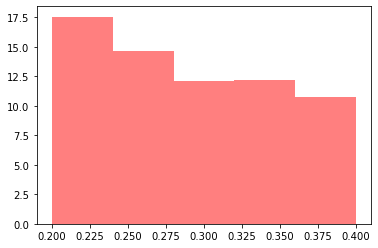

In [107]:
bins = np.linspace(0.2, 0.4, 6)#0.15
n, bins2, patches = plt.hist(evis_rec, bins, alpha=0.5, color='r', weights=multi_weight_good, label='Photons - Smeared')

In [108]:
integral_histo_photon = 0
for i in range(len(n)):
    integral_histo_photon =  integral_histo_photon + n[i]

In [109]:
number_of_photons = integral_histo_photon

In [110]:
print(number_of_photons)

67.17105584039288
